## **Trabajo Práctico Final: Exploratory Data Analysis**
____
**Universidad Tecnológica Nacional, Buenos Aires**\
**Ingeniería Industrial**\
**Ciencia de Datos** - Curso I5521\
**Grupo** N°11\
**Integrantes:** Leandro Del Sordo y Nicolas Ferreyra
____

# **INTRODUCCIÓN**

En un entorno altamente competitivo, las instituciones financieras enfrentan el desafío constante de diseñar estrategias de marketing más efectivas para captar y retener clientes. En este contexto, el presente trabajo aborda un problema planteado por un banco particular, que busca predecir cuáles de sus clientes es más probable que se suscriban a una campaña de marketing específica. La capacidad de identificar de manera precisa a estos clientes permitirá optimizar los recursos, reducir costos y aumentar la efectividad de las campañas, generando un impacto positivo tanto en los ingresos del banco como en la satisfacción de los clientes.

Para abordar este problema, se dispone de un conjunto de datos que comprende información de 45.211 clientes, descritos por 17 variables que reflejan características socioeconómicas, de comportamiento y de interacción con el banco.

Se cuenta con las siguientes características:


*   Age: Edad del cliente
*   Job: Tipo de empleo del cliente
*   Marital Status: Estado civil
*   Education: Educacion maxima alcanzada por el cliente
*   Credit: Si tiene deuda de crédito o no
*   Balance (euros): Promedio de saldo en la cuenta en el año
*   Housing Loan: Si tiene seguro de hogar o no
*   Personal Loan: Si tiene prestamos o no
*   Contact: Tipo con contacto del cliente
*   Last Contact Day: Ultimo dia de contacto con el cliente en el mes
*   Last Contact Month: Ultimo mes de contacto con el cliente en el anio
*   Last Contact Duration: Duracion del ultimo contacto con el cliente medido en segundos
*   Campaign: Cantidad de contactos al cliente durante esta campania, incluye el último contacto.
*   Pdays: Cantidad de dias que pasaron del último contacto con el cliente de una campania anterior. -1 significa que no hubo contacto previo
*   Previous: Cantidad de contactos previos a esta campania para cada cliente
*   Poutcome: Performance de la campania de marketing anterior para este cliente
*   Subscription: Si el cliente accede a la campania (1) o no (0).



# Objetivo

Elaborar un modelo de data science que permita predecir la probabilidad de **suscripción** de los clientes del banco a una campaña de marketing.

# Librerias utilizadas

Importamos las librerias utilizadas para el desarrollo del trabajo

In [3]:
# Librerias Generales
from google.colab import drive
import numpy as np
import pandas as pd
import warnings

# Librerias para EDA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

warnings.filterwarnings("ignore")

In [21]:
# Prepocessing & Utils.
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
#Metricas
from sklearn.metrics import accuracy_score,roc_curve, auc,confusion_matrix,roc_auc_score
# Modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier






# Descripción del Dataset

Para poder leer el dataset es necesario conectarse a la carpeta en Google Drive donde está ubicado

In [4]:
# Montar Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Ruta al archivo en Google Drive
file_path = '/content/drive/My Drive/ClusterAI/clientes_new.csv'


Leemos el dataset luego de la transformación del EDA

In [8]:
# Importo el dataset
clientes_new = pd.read_csv(file_path, delimiter=',',encoding='latin-1')

In [9]:
clientes_new.head()

,Age,Balance (euros),Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Subscription,Job_admin.,...,Credit_yes,Housing Loan_unknown,Housing Loan_yes,Personal Loan_unknown,Personal Loan_yes,Contact_telephone,Contact_unknown,Poutcome_other,Poutcome_success,Poutcome_unknown
0,33.0,2.0,5,5,76.000000,1.0,-1.0,0.0,0,False,...,False,False,True,False,True,False,True,False,False,True
1,33.0,1.0,5,5,258.511446,1.0,-1.0,0.0,0,False,...,False,False,False,False,False,False,True,False,False,True
2,28.0,447.0,5,5,217.000000,1.0,-1.0,0.0,0,False,...,False,False,True,False,True,False,True,False,False,True
3,58.0,121.0,5,5,50.000000,1.0,-1.0,0.0,0,False,...,False,False,True,False,False,False,True,False,False,True
4,43.0,593.0,5,5,55.000000,1.0,-1.0,0.0,0,False,...,False,False,True,False,False,False,True,False,False,True


# **2° PARTE** - Machine Learning

## Modelos empleados

Para el desarrollo se va a comparar mediante métricas la performance de distintos modelos.


1.   **Random Forest**

Es un modelo basado en la combinación de múltiples árboles de decisión para mejorar la precisión y reducir el riesgo de sobreajuste. Cada árbol se entrena con un subconjunto aleatorio de datos y características, y la predicción final se basa en la votación mayoritaria (para clasificación).

2.   **Logistic Regression**

Es un modelo lineal que estima la probabilidad de que una observación pertenezca a una clase usando la función sigmoide. Es sencillo, rápido de entrenar y efectivo para problemas de clasificación binaria o multiclase cuando las relaciones entre las variables son lineales.

3.   **Neural Network (MLPClassifier)**

Este modelo imita el funcionamiento del cerebro humano mediante capas de nodos interconectados (neuronas). Es potente para capturar relaciones complejas y no lineales en los datos, aunque puede requerir más datos y tiempo de entrenamiento en comparación con otros modelos.







## Feature a predecir

Primero dividimos la información en función de las variables independientes (x) y la variable respuesta (y) que queremos predecir.

Luego, se dividen los datos en train y test.


*   Train: se usarán para entrenar los modelos, pudiendo ajustar los hiperparámetros para lograr las mejores predicciones
*   Test: son datos no vistos por el modelo que se usarán para evaluarlo con las distintas métricas



In [10]:
Y = np.array(clientes_new[['Subscription']])     # Variable dependiente
X = clientes_new.drop(['Subscription'], axis=1)    # Variables independientes


# Spliteamos Train y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


## Métricas

De cada uno de los modelos se van a hacer distintas pruebas con hiperparámetros mediante Grid Search. De esta forma se van a obtener los hiperparámetos que hayan dado las mejores predicciones y a partir de esos se obtienen las siguientes métricas:



*   **Accuracy:** Visión general del rendimiento global. La proporción de predicciones correctas entre todas las predicciones realizadas.
*   **Precision:** Qué tan confiables son las predicciones positivas. La proporción de predicciones positivas que son correctas.
*   **Recall:** Qué tan bien detecta el modelo los casos positivos reales. La proporción de casos positivos reales que el modelo identifica correctamente.
*   **F1-Score:** Balance entre precisión y recall. La media armónica entre precision y recall, que balancea ambos aspectos.



## Matriz de Confusión y Curva AUC-ROC

Se definen funciones comunes a todos los modelos para graficar la Matriz de Confusión y la curva AUC-ROC

In [18]:
# Función para graficar la Matriz de Confusión
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
    plt.title(f"Matriz de Confusión - {model_name}")
    plt.xlabel("Predicciones")
    plt.ylabel("Valores Reales")
    plt.show()

In [22]:
def plot_roc_curve(y_true, y_pred_prob, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    auc = roc_auc_score(y_true, y_pred_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title(f'Curva ROC - {model_name}')
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

## Random Forest

Random Forest
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      6299
           1       0.65      0.32      0.43       864

    accuracy                           0.90      7163
   macro avg       0.78      0.65      0.69      7163
weighted avg       0.88      0.90      0.88      7163



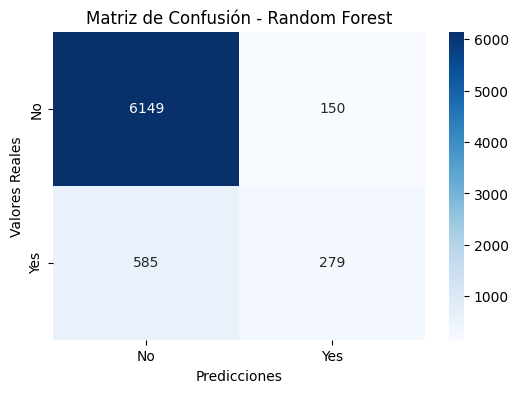

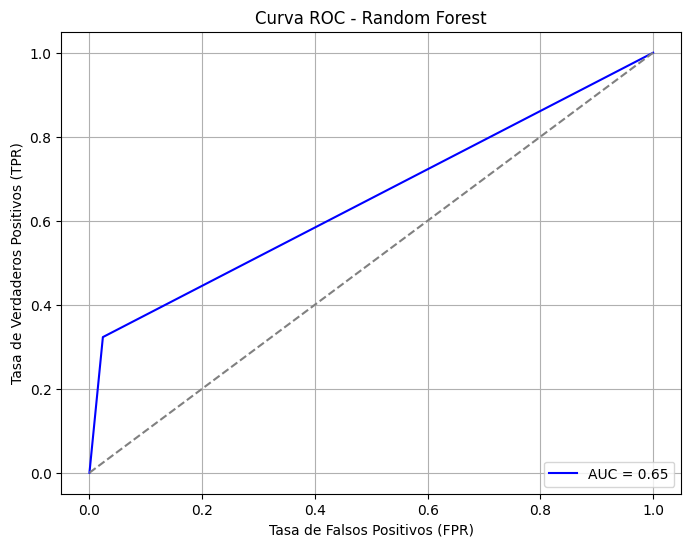

In [23]:
# Random Forest


# Definir parámetros para Grid Search
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Inicializar el modelo
rf = RandomForestClassifier(random_state=0)

# Grid Search con validación cruzada
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, Y_train.ravel())

# Mejor modelo y evaluación
best_rf = grid_rf.best_estimator_
Y_pred_rf = best_rf.predict(X_test)

# Métricas de evaluación
print("Random Forest")
print("Best Parameters:", grid_rf.best_params_)
print(classification_report(Y_test, Y_pred_rf))

plot_confusion_matrix(Y_test, Y_pred_rf, "Random Forest")
plot_roc_curve(Y_test, Y_pred_rf, "Random Forest")



## Logistic Regression

Logistic Regression
Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      6299
           1       0.67      0.29      0.41       864

    accuracy                           0.90      7163
   macro avg       0.79      0.64      0.68      7163
weighted avg       0.88      0.90      0.88      7163



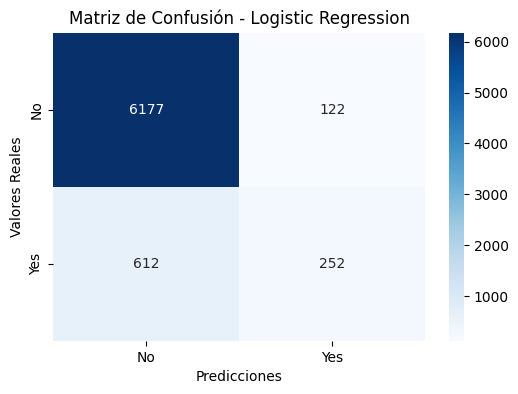

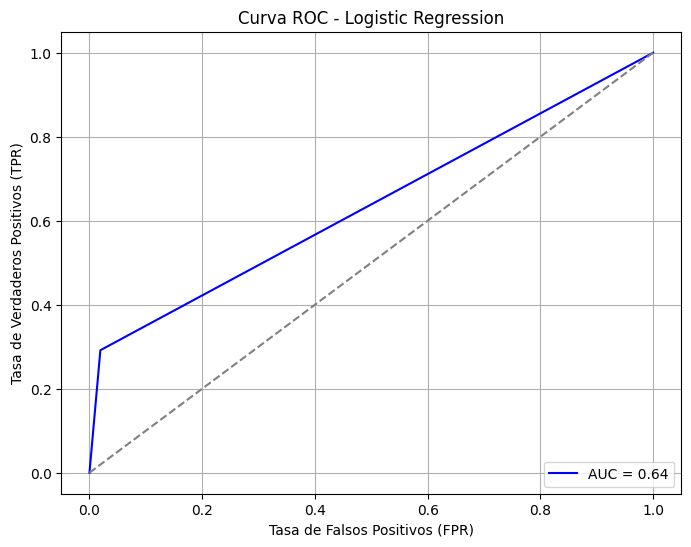

In [24]:
# Logistic regression

# Definir parámetros para Grid Search
param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

# Inicializar el modelo
lr = LogisticRegression(random_state=0, max_iter=1000)

# Grid Search con validación cruzada
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train, Y_train.ravel())

# Mejor modelo y evaluación
best_lr = grid_lr.best_estimator_
Y_pred_lr = best_lr.predict(X_test)

# Métricas de evaluación
print("Logistic Regression")
print("Best Parameters:", grid_lr.best_params_)
print(classification_report(Y_test, Y_pred_lr))

plot_confusion_matrix(Y_test, Y_pred_lr, "Logistic Regression")
plot_roc_curve(Y_test, Y_pred_lr, "Logistic Regression")

## Neural Network (MLP Classifier)

Neural Network
Best Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50)}
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6299
           1       0.58      0.30      0.40       864

    accuracy                           0.89      7163
   macro avg       0.74      0.64      0.67      7163
weighted avg       0.87      0.89      0.87      7163



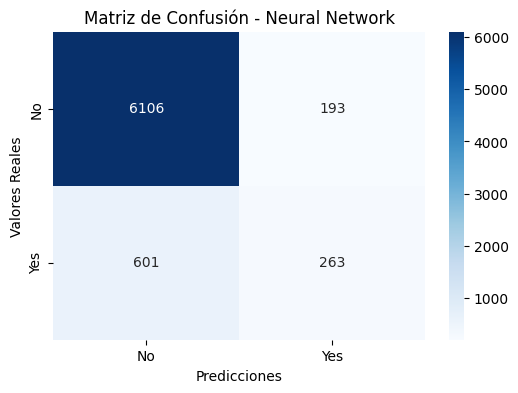

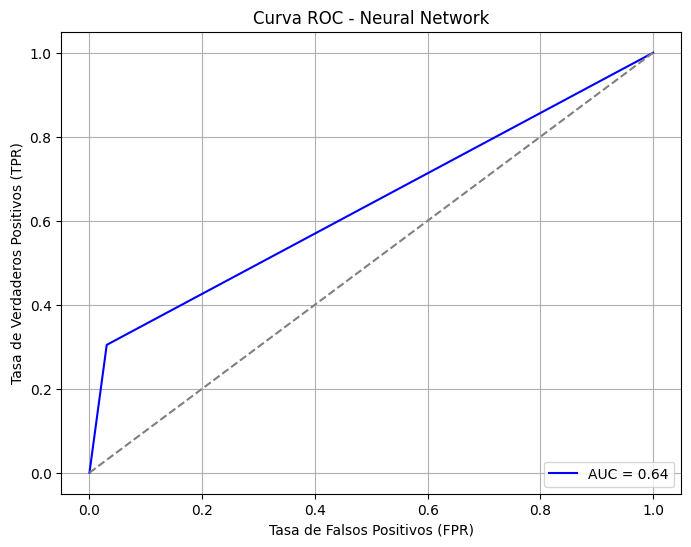

In [25]:
# Definir parámetros para Grid Search
param_grid_nn = {
    'hidden_layer_sizes': [(50, 50), (100,)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001]
}

# Inicializar el modelo
nn = MLPClassifier(random_state=0, max_iter=1000)

# Grid Search con validación cruzada
grid_nn = GridSearchCV(nn, param_grid_nn, cv=5, scoring='accuracy', n_jobs=-1)
grid_nn.fit(X_train, Y_train.ravel())

# Mejor modelo y evaluación
best_nn = grid_nn.best_estimator_
Y_pred_nn = best_nn.predict(X_test)

# Métricas de evaluación
print("Neural Network")
print("Best Parameters:", grid_nn.best_params_)
print(classification_report(Y_test, Y_pred_nn))

plot_confusion_matrix(Y_test, Y_pred_nn, "Neural Network")
plot_roc_curve(Y_test, Y_pred_nn, "Neural Network")


## Con reducción de la dimensionalidad (PCA)

Se repite el proceso pero aplicando un método de reducción de la dimensionalidad para comparar los resultados. Se aplica PCA.

El PCA (Análisis de Componentes Principales) es una técnica de reducción de dimensionalidad que transforma un conjunto de variables originales en un nuevo conjunto de variables linealmente no correlacionadas llamadas componentes principales. Estas componentes capturan la mayor parte de la varianza de los datos con menos dimensiones, preservando la información relevante. Es útil para simplificar datos, eliminar ruido y mejorar el rendimiento de modelos de machine learning.

In [26]:
# Reducir a un número específico de componentes principales
n_components = 10
pca = PCA(n_components=n_components)

# Aplicar PCA a los datos de entrenamiento y prueba
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Visualizar la varianza explicada por los componentes
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por los {n_components} componentes principales: {explained_variance}")
print(f"Varianza total explicada: {sum(explained_variance):.2f}")


Varianza explicada por los 10 componentes principales: [9.93589577e-01 5.54699061e-03 8.45078401e-04 1.01421732e-05
 6.97185818e-06 5.69447707e-07 3.53072264e-07 4.74603413e-08
 4.21785022e-08 3.36376223e-08]
Varianza total explicada: 1.00


Random Forest con PCA
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6299
           1       0.61      0.32      0.42       864

    accuracy                           0.89      7163
   macro avg       0.76      0.65      0.68      7163
weighted avg       0.88      0.89      0.88      7163



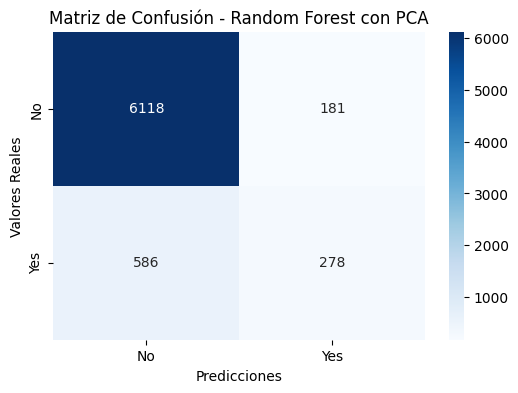

In [27]:
# Random Forest
rf = RandomForestClassifier(random_state=0)
grid_rf_pca = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf_pca.fit(X_train_pca, Y_train.ravel())

best_rf_pca = grid_rf_pca.best_estimator_
Y_pred_rf_pca = best_rf_pca.predict(X_test_pca)

# Evaluar métricas y graficar matriz de confusión
print("Random Forest con PCA")
print("Best Parameters:", grid_rf_pca.best_params_)
print(classification_report(Y_test, Y_pred_rf_pca))
plot_confusion_matrix(Y_test, Y_pred_rf_pca, "Random Forest con PCA")


Con PCA **no mejoran** los resultados por lo que decide no aplicarse al modelo. En este caso el accuracy es de un 89% siendo previamente de 90%

# Conclusiones

En este proyecto, se evaluaron y compararon tres modelos de machine learning (Random Forest, Logistic Regression y Neural Network) con el objetivo de predecir la suscripción de clientes a un producto bancario luego de una campaña de marketing.

El análisis incluyó la optimización de hiperparámetros mediante Grid Search y la evaluación de métricas clave como accuracy, precision, recall, y F1-score. Además, se analizaron las matrices de confusión y las curvas ROC para entender mejor el desempeño de cada modelo, tanto en términos globales como específicos para cada clase, considerando un dataset desbalanceado.

El proceso permitió identificar las fortalezas y debilidades de cada modelo, con especial atención a la capacidad de detectar correctamente la clase minoritaria (clientes que sí se suscribieron), un aspecto crítico para este caso de negocio.

Los modelos tienen un desempeño similar en términos de accuracy:

*   **Random Forest:** 90%
*   **Logistic Regression:** 90%
*   **Neural Network:** 89%

Sin embargo, al analizar más profundamente las métricas por clase (precisión, recall y F1-score), surgen diferencias significativas, especialmente en cómo manejan la clase minoritaria (1).

Dado que se considera más importante maximizar el rendimiento de las subscripciones (Subscription = 1), Random Forest resulta la mejor opción. Proporciona un buen balance entre las métricas, con el mejor F1-Score (43%) para la clase 1, superando a Logistic Regression (41%) y Neural Network (40%).